In [2]:
import numpy as np
import os
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.utils import to_categorical
from alibi.explainers import IntegratedGradients
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from alibi.datasets import fetch_imagenet
%matplotlib inline
%set_env CUDA_VISIBLE_DEVICES=2
tf.test.is_gpu_available()

env: CUDA_VISIBLE_DEVICES=2


True

# Load data

In [3]:
category = 'Persian cat'
image_shape = (224, 224, 3)
data, labels = fetch_imagenet(category, nb_images=10, target_size=image_shape[:2], seed=2, return_X_y=True)
print('Images shape: {}'.format(data.shape))

Images shape: (10, 224, 224, 3)


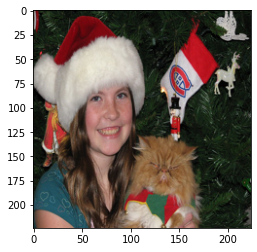

In [5]:
i = 1
plt.imshow(data[i]);

# Load model

In [4]:
model_tf = ResNet50V2(weights='imagenet')

# Integrated gradients

In [6]:
n_steps = 50
method = "gausslegendre"
return_convergence_delta = True
return_predictions = False
ig_tf  = IntegratedGradients(model_tf,
                          n_steps=n_steps, 
                          method=method,
                          return_convergence_delta=return_convergence_delta, 
                          return_predictions=return_predictions)

In [7]:
explanation = ig_tf.explain(data[:2], 
                         baselines=None, 
                         target=labels[:2], 
                         internal_batch_size=10)

In [8]:
attrs = explanation.data['attributions']

# Visualize attributions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


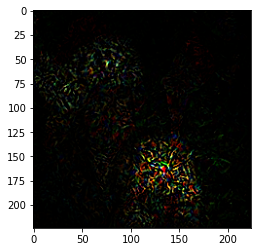

In [25]:
i = 1
plt.imshow(data[i])
plt.imshow(3 * attrs[i] / attrs[i].max())